# 1. Load Training and Test Data from kaggel site

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')

# 2. Not all the Training images have the facial keypoint features
### 2.1 Only 2,140 images have all features (facial keypoint coordinates available)

Training Data Variables and count


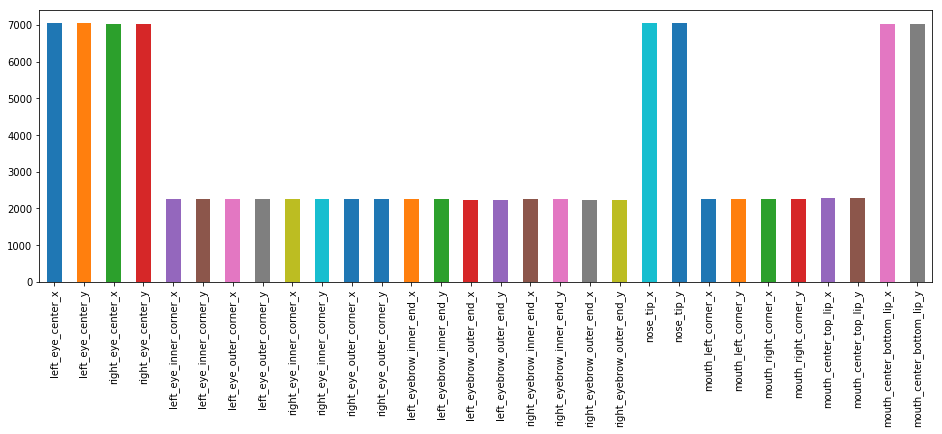

In [4]:
print('Training Data Variables and count')
plt.figure(figsize=(16,5))
train_data.describe().loc['count'].plot.bar()
plt.show()

## 2.2 For baseline analysis, retain only those images that have all keypoint coordinates available in the training data
#### 2.2.1 Also, seperate out the image pixle values from space seperated value to coma seperated array/ list

In [5]:
#Seperate out the image pixle values into a comma seperated array 
train_data['Image'] = train_data['Image'].apply(lambda im: np.fromstring(im, sep=' '))
train_data = train_data.dropna()
train_data = train_data.reset_index(drop=True)

#### 2.2.2 Create a list of all features, one for x and another for y coordinates

In [6]:
#Train data output field
output_field_x = ['left_eye_center_x','right_eye_center_x',
'left_eye_inner_corner_x','left_eye_outer_corner_x','right_eye_inner_corner_x','right_eye_outer_corner_x',
'left_eyebrow_inner_end_x','left_eyebrow_outer_end_x','right_eyebrow_inner_end_x','right_eyebrow_outer_end_x', 
'nose_tip_x',
'mouth_left_corner_x','mouth_right_corner_x','mouth_center_top_lip_x','mouth_center_bottom_lip_x']
output_field_y = ['left_eye_center_y','right_eye_center_y',
'left_eye_inner_corner_y','left_eye_outer_corner_y','right_eye_inner_corner_y','right_eye_outer_corner_y',
'left_eyebrow_inner_end_y','left_eyebrow_outer_end_y','right_eyebrow_inner_end_y','right_eyebrow_outer_end_y', 
'nose_tip_y',
'mouth_left_corner_y','mouth_right_corner_y','mouth_center_top_lip_y','mouth_center_bottom_lip_y']
# Flip data output field
flip_output_field_x = ['right_eye_center_x','left_eye_center_x',
'right_eye_inner_corner_x','right_eye_outer_corner_x','left_eye_inner_corner_x','left_eye_outer_corner_x',
'right_eyebrow_inner_end_x','right_eyebrow_outer_end_x','left_eyebrow_inner_end_x','left_eyebrow_outer_end_x', 
'nose_tip_x',
'mouth_right_corner_x','mouth_left_corner_x','mouth_center_top_lip_x','mouth_center_bottom_lip_x']
flip_output_field_y = ['right_eye_center_y','left_eye_center_y',
'right_eye_inner_corner_y','right_eye_outer_corner_y','left_eye_inner_corner_y','left_eye_outer_corner_y',
'right_eyebrow_inner_end_y','right_eyebrow_outer_end_y','left_eyebrow_inner_end_y','left_eyebrow_outer_end_y', 
'nose_tip_y',
'mouth_right_corner_y','mouth_left_corner_y','mouth_center_top_lip_y','mouth_center_bottom_lip_y']

## 2.3 Since we only 2,140 images for training and testing baseline assumptions, we have created 2,140 more images by simply flipping the image on y-axis

In [7]:
# FLIP TRAINING IMAGES
flip_train_data = train_data.copy()
print(len(flip_train_data))
for x1,x2 in zip(output_field_x,flip_output_field_x):
    flip_train_data[x2] = 95-train_data[x1]
for y1,y2 in zip(output_field_y,flip_output_field_y):
    flip_train_data[y2] = train_data[y1]

flipped_image_list = []
for i in range(len(flip_train_data)):
    flipped_image_list.append(np.flip(flip_train_data['Image'][i].reshape(96,96),1).reshape(96*96))
new_df = pd.DataFrame({'Image': flipped_image_list})
flip_train_data.update(new_df)
flip_train_data.describe().loc[['mean']]

2140


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
mean,65.359731,37.063815,28.778451,36.842274,58.396893,37.920852,72.638383,38.034571,35.727872,37.856014,...,47.047859,57.253926,62.032635,76.134065,31.580924,75.88766,46.918675,72.681125,46.850346,82.630412


Print a sample image from training data


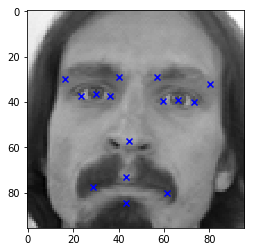

In [8]:
print('Print a sample image from training data')
plt.imshow((train_data['Image'][0]).reshape(96,96),cmap='gray')
for x,y in zip(output_field_x,output_field_y):
    X = train_data[x][0]
    Y = train_data[y][0]
    plt.scatter(X,Y,marker='x',color='blue')
plt.show()

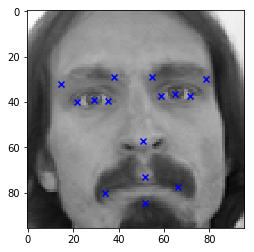

In [9]:
flip_im = flip_train_data['Image'][0].reshape(96,96)
plt.imshow(flip_im,cmap='gray')
for x,y in zip(output_field_x,output_field_y):
    X = 95-train_data[x][0]
    Y = train_data[y][0]
    plt.scatter(X,Y,marker='x',color='blue')
plt.show()

# 3. Split 4,280 training images into 80% Training and 20% Test data

In [10]:
#APPEND AND SHUFFLE TRAINING DATA AND FLIPPED TRAINING DATA
train_data_extended = train_data.append(flip_train_data).sample(frac=1).reset_index(drop=True)
baseline_train = train_data_extended.loc[np.arange(0,int(0.8*len(train_data_extended)))].reset_index(drop=True)
avg_train_x_y = baseline_train.describe().loc[['mean']]
baseline_test = train_data_extended.loc[np.arange(int(0.8*len(train_data_extended)),len(train_data_extended))].reset_index(drop=True)

# 4. We are simply going to take an average of all keypoint cordinates from training data set to be the predicted keypoint cordinates

In [11]:
print('Predicted positions of facial Keypoint cordinates: Average x and y cordinates for each facial keypoint')
avg_train_x_y.transpose()

Predicted positions of facial Keypoint cordinates: Average x and y cordinates for each facial keypoint


,mean
left_eye_center_x,65.787117
left_eye_center_y,36.924805
right_eye_center_x,29.196876
right_eye_center_y,36.937899
left_eye_inner_corner_x,58.818710
left_eye_inner_corner_y,37.867928
left_eye_outer_corner_x,73.023513
left_eye_outer_corner_y,37.798031
right_eye_inner_corner_x,36.153555
right_eye_inner_corner_y,37.876290


# 5. Use the predicted keypoint cordinates to find RMSE through comparison with the actual keypoints from the dev data

In [12]:
import math
SS_dist = []
RMSE_LIST = []
for i in range(len(baseline_test)):
    L2_dist = []
    RMSE = 0
    for x,y in zip(output_field_x,output_field_y):
        x_dist = (baseline_test[x][i]-avg_train_x_y[x][0])**2
        y_dist = (baseline_test[y][i]-avg_train_x_y[y][0])**2
        L2_dist.append(math.sqrt(x_dist+y_dist))
        RMSE = RMSE+x_dist+y_dist
    RMSE_LIST.append(RMSE)
    SS_dist.append(L2_dist)

SS_DF = pd.DataFrame(data=SS_dist,columns=output_field_x)
SS_DF_mean = pd.DataFrame(data=SS_dist,columns=output_field_x).describe().loc[['mean']]
print('Mean pixle distance between the actual and predicted facial keypoints:')
SS_DF_mean.loc['mean']

Mean pixle distance between the actual and predicted facial keypoints:


left_eye_center_x            2.520153
right_eye_center_x           2.587645
left_eye_inner_corner_x      2.303727
left_eye_outer_corner_x      3.192388
right_eye_inner_corner_x     2.394628
right_eye_outer_corner_x     3.199437
left_eyebrow_inner_end_x     3.287564
left_eyebrow_outer_end_x     4.068400
right_eyebrow_inner_end_x    3.391623
right_eyebrow_outer_end_x    4.201634
nose_tip_x                   4.503437
mouth_left_corner_x          4.731858
mouth_right_corner_x         4.780987
mouth_center_top_lip_x       4.703556
mouth_center_bottom_lip_x    4.747167
Name: mean, dtype: float64

In [13]:
SS_DF['Avg Distances'] = SS_DF.sum(axis = 1, skipna = True)

# 5.1 Images with highest RMSE

In [14]:
print('Top 5 images with highest RMSE')
SS_DF.sort_values(by = ['Avg Distances'], ascending=False)[0:5]

Top 5 images with highest RMSE


,left_eye_center_x,right_eye_center_x,left_eye_inner_corner_x,left_eye_outer_corner_x,right_eye_inner_corner_x,right_eye_outer_corner_x,left_eyebrow_inner_end_x,left_eyebrow_outer_end_x,right_eyebrow_inner_end_x,right_eyebrow_outer_end_x,nose_tip_x,mouth_left_corner_x,mouth_right_corner_x,mouth_center_top_lip_x,mouth_center_bottom_lip_x,Avg Distances
784,10.771797,18.021719,13.328659,7.651265,17.237224,20.109060,15.190067,6.616835,20.687224,23.934420,23.114705,8.768752,17.075424,15.595667,17.658622,235.761439
497,9.217062,9.283117,4.569418,12.518614,7.245254,12.509512,7.475150,15.546825,11.067152,16.936073,4.334094,15.544725,13.621476,12.135539,14.971692,166.975703
345,8.431765,8.606310,3.751645,11.149620,6.420347,11.642618,4.500578,14.676928,9.875631,15.316620,5.595601,16.821769,15.046073,13.087246,17.792207,162.714958
433,13.144453,12.611068,10.850370,13.770666,11.630850,13.431316,11.103544,19.578410,11.259088,17.539632,3.872212,4.976779,4.792797,6.127151,4.213036,158.901369
592,13.034843,5.341219,5.073899,14.617837,6.534177,3.071294,3.115152,12.691253,1.044542,10.100856,6.808271,22.675342,17.715385,21.386251,13.177741,156.388062


Print a sample image with highest RMSE
Blue: Actual
Red: Predicted


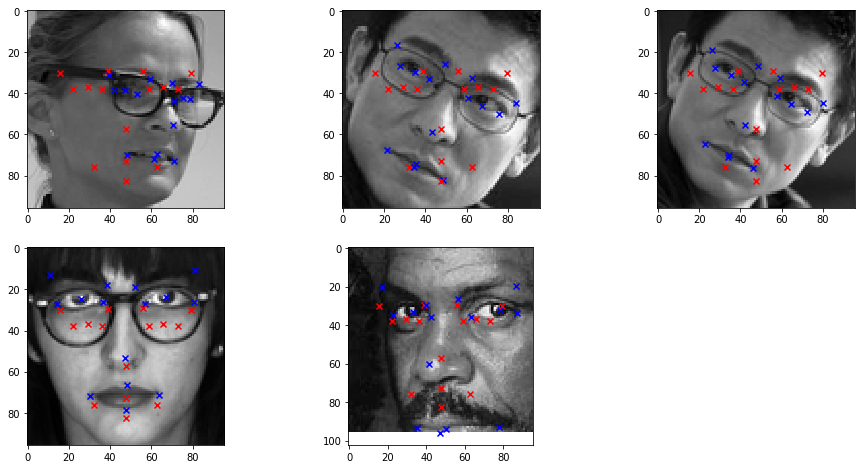

In [15]:
print('Print a sample image with highest RMSE\nBlue: Actual\nRed: Predicted')
plt.figure(figsize=(16,8))
count=0
for i in SS_DF.sort_values(by = ['Avg Distances'], ascending=False)[0:5].index:
    count=count+1
    plt.subplot(2,3,count)
    plt.imshow((baseline_test['Image'][i]).reshape(96,96),cmap='gray')
    for x,y in zip(output_field_x,output_field_y):
        X1 = avg_train_x_y[x][0]
        Y1 = avg_train_x_y[y][0]
        X2 = baseline_test[x][i]
        Y2 = baseline_test[y][i]
        plt.scatter(X1,Y1,marker='x',color='red')
        plt.scatter(X2,Y2,marker='x',color='blue')
plt.show()

In [16]:
print('Overall RMSE for the Facial keypoint analysis baseline is: '
      +str(round(math.sqrt(sum(RMSE_LIST)/(len(baseline_test)*30)),2)))

Overall RMSE for the Facial keypoint analysis baseline is: 3.16


# 6. Convolutional Neural Network

### 6.1 Create Train and test data from original train data and add the flipped images

In [17]:
train_data = pd.read_csv('training.csv')
train_data.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [18]:
print(train_data['Image'].head(1))
print(train_data['Image'].shape)

0    238 236 237 238 240 240 239 241 241 243 240 23...
Name: Image, dtype: object
(7049,)


In [19]:
train_data['Image'] = train_data['Image'].apply(lambda im: np.fromstring(im, sep=' ')/255)

In [20]:
print(train_data['Image'].head(1))

0    [0.9333333333333333, 0.9254901960784314, 0.929...
Name: Image, dtype: object


In [960]:
train_data_blurred = train_data.copy()
#train_data_blurred['Image'] = ImageBlur(train_data_blurred['Image'])

## 6.2 Reduce image resolution to 32x32

In [961]:
def reduce_image(train_data_blurred):
    yy = []
    for index in range(train_data_blurred.shape[0]):
        x = train_data_blurred['Image'][index]
        y = []
        for r in np.arange(1,96,3):
            for c in np.arange(1,96,3):
                ii = r*96 + c
                tmp = 0
                for index in [-97,-96,-95,-1,0,1,95,96,97]:
                    try:
                        tmp = tmp + x[ii+index]
                        #tmp = max(tmp,x[ii_index])
                    except:
                        continue
                y.append(tmp/9)
                #y.append(tmp)
        yy.append(y)
    train_data_blurred['Image'] = yy
    for x_field_name in output_field_x:
        train_data_blurred[x_field_name] = train_data_blurred[x_field_name]/3
    for y_field_name in output_field_y:
        train_data_blurred[y_field_name] = train_data_blurred[y_field_name]/3
    return train_data_blurred
train_data_blurred = reduce_image(train_data_blurred)

In [962]:
def flip_image(train_data_blurred):
    flip_train_data1 = train_data_blurred.copy()
    for x1,x2 in zip(output_field_x,flip_output_field_x):
        flip_train_data[x2] = (95/3)-flip_train_data1[x1]
    for y1,y2 in zip(output_field_y,flip_output_field_y):
        flip_train_data[y2] = flip_train_data1[y1]

    flipped_image_list = []
    for i in range(len(flip_train_data)):
        flipped_image_list.append(np.flip(np.array(flip_train_data1['Image'][i]).reshape(32,32),1).reshape(32*32))
    new_df = pd.DataFrame({'Image': flipped_image_list})
    flip_train_data.update(new_df)
    return flip_train_data

flip_train_data = flip_image(train_data_blurred)

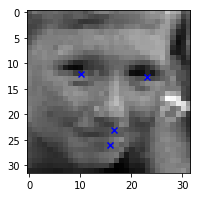

In [963]:
i = 5555
plt.figure(figsize=(3,3))
plt.imshow(np.array(train_data_blurred['Image'][i]).reshape(32,32),cmap='gray')

for xx,yy in zip(output_field_x,output_field_y):
    X = train_data_blurred[xx][i]
    Y = train_data_blurred[yy][i]
    plt.scatter(X,Y,marker='x',color='blue')

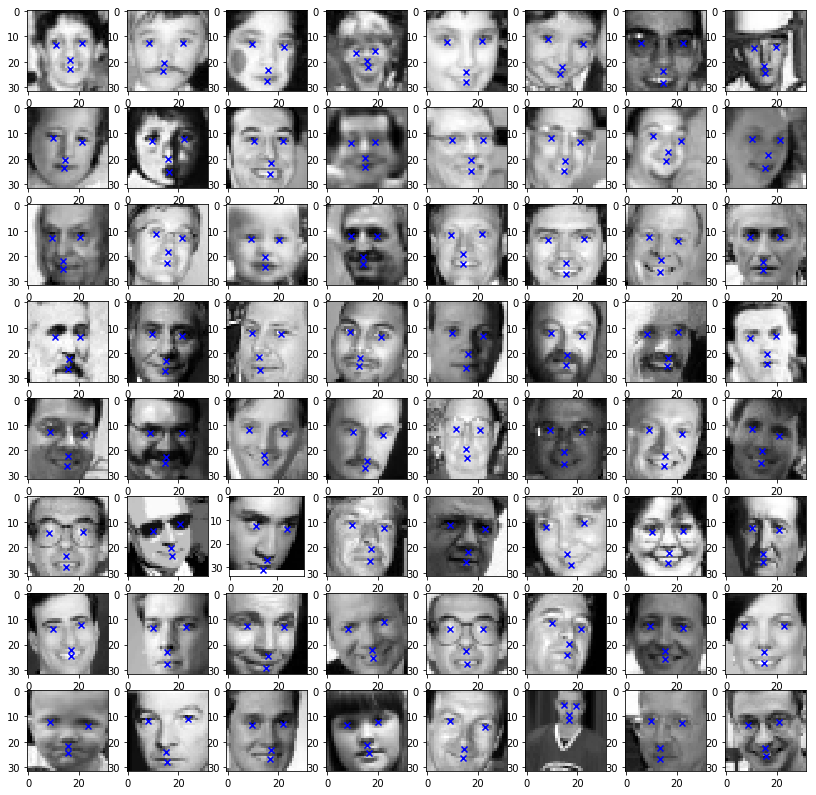

In [964]:
j=(79)*64
plt.figure(figsize=(14,14))
for i in range(j,64+j):
    plt.subplot(8,8,(i-j)+1)
    plt.imshow(np.array(flip_train_data['Image'][i]).reshape(32,32),cmap='gray')

    for xx,yy in zip(output_field_x,output_field_y):
        X = flip_train_data[xx][i]
        Y = flip_train_data[yy][i]
        plt.scatter(X,Y,marker='x',color='blue')
plt.show()

In [965]:
#APPEND AND SHUFFLE TRAINING DATA AND FLIPPED TRAINING DATA
train_data_extended = train_data_blurred.append(flip_train_data).sample(frac=1).reset_index(drop=True)
train = train_data_extended.loc[np.arange(0,int(0.8*len(train_data_extended)))].reset_index(drop=True)
test = train_data_extended.loc[np.arange(int(0.8*len(train_data_extended)),len(train_data_extended))].reset_index(drop=True)

In [966]:
X_train = np.array([np.array(train['Image'][i]).reshape(32*32) for i in range(0,train.shape[0])])
print('Train X: '+str(x_train.shape))

X_test = np.array([np.array(test['Image'][i]).reshape(32*32) for i in range(0,test.shape[0])])
print('Test X'+str(x_test.shape))

Train X: (11278, 1024)
Test X(2820, 1024)


In [967]:
y_columns = []
y_columns.extend(output_field_x)
y_columns.extend(output_field_y)
Y_train = np.array(train[y_columns])
Y_test = np.array(test[y_columns])
print('Train Y: '+str(y_train.shape))
print('Test Y: '+str(y_test.shape))

Train Y: (11278, 30)
Test Y: (2820, 30)


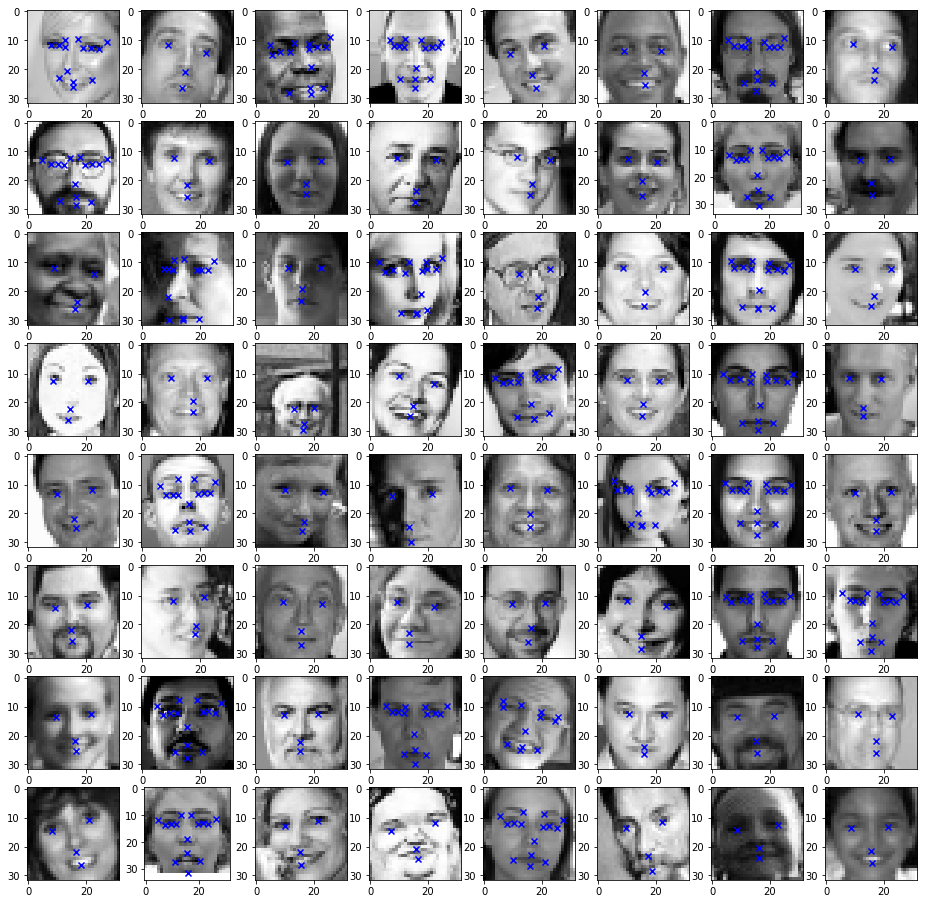

In [968]:
j=1*64
plt.figure(figsize=(16,16))
for i in range(j,64+j):
    plt.subplot(8,8,(i-j)+1)
    plt.imshow(np.array(train_data_extended['Image'][i]).reshape(32,32),cmap='gray')
    #for x_index, y_index in zip(Y_train[i][0:15], Y_train[i][15:30]):
        #plt.scatter(x_index,y_index,marker='x',color='blue')
    for xx,yy in zip(output_field_x,output_field_y):
        plt.scatter(train_data_extended[xx][i],train_data_extended[yy][i],marker='x',color='blue')
plt.show()

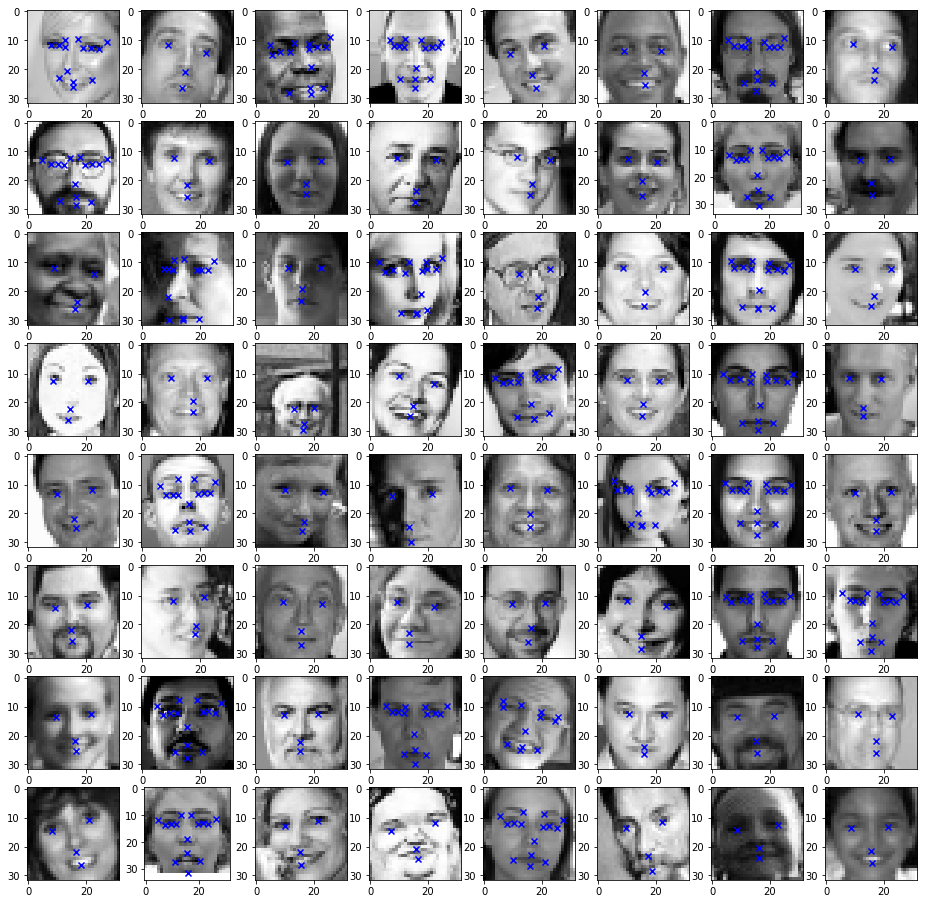

In [969]:
j=1*64
plt.figure(figsize=(16,16))
for i in range(j,64+j):
    plt.subplot(8,8,(i-j)+1)
    plt.imshow(np.array(train['Image'][i]).reshape(32,32),cmap='gray')
    #for x_index, y_index in zip(Y_train[i][0:15], Y_train[i][15:30]):
        #plt.scatter(x_index,y_index,marker='x',color='blue')
    for xx,yy in zip(output_field_x,output_field_y):
        plt.scatter(train[xx][i],train[yy][i],marker='x',color='blue')
plt.show()

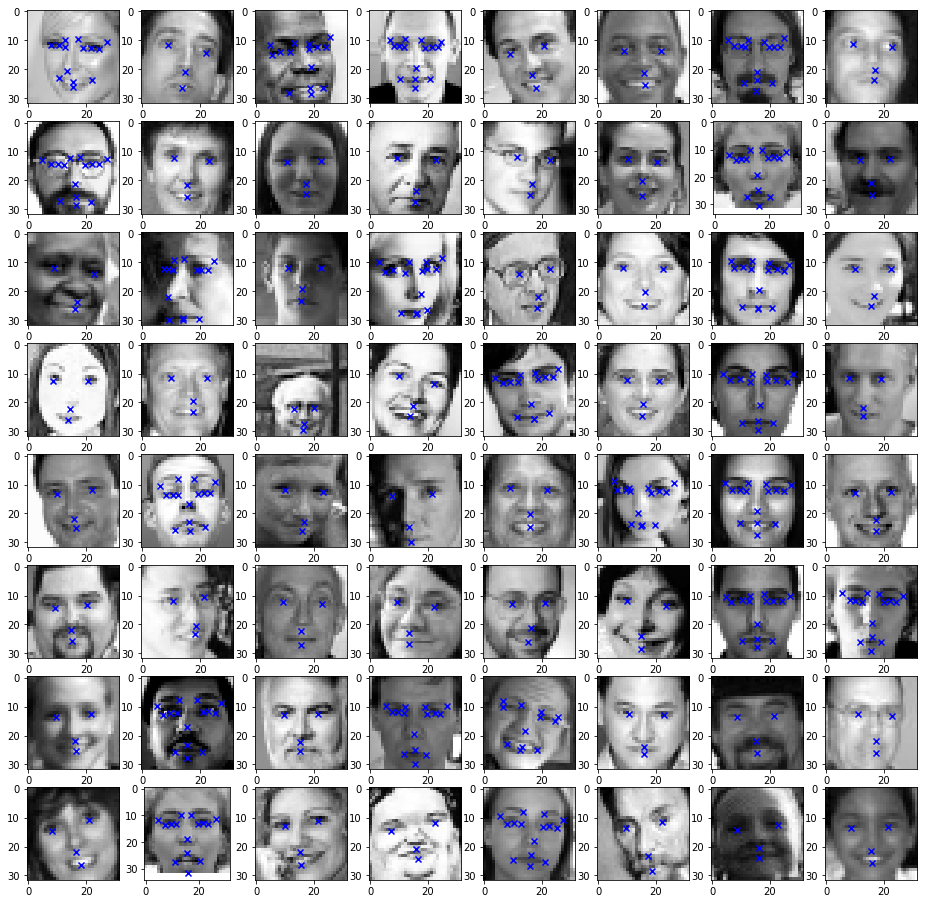

In [970]:
j=1*64
plt.figure(figsize=(16,16))
for i in range(j,64+j):
    plt.subplot(8,8,(i-j)+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    for x_index, y_index in zip(Y_train[i][0:15], Y_train[i][15:30]):
        plt.scatter(x_index,y_index,marker='x',color='blue')
plt.show()

## 6.3 Remove images with incomplete keypoints

In [971]:
X_train = X_train[[~np.isnan(Y_train_ITEM).any() for Y_train_ITEM in Y_train]]
Y_train = Y_train[[~np.isnan(Y_train_ITEM).any() for Y_train_ITEM in Y_train]]
X_test = X_test[[~np.isnan(Y_test_ITEM).any() for Y_test_ITEM in Y_test]]
Y_test = Y_test[[~np.isnan(Y_test_ITEM).any() for Y_test_ITEM in Y_test]]
print('Train data with all keypoints:'+str(X_train.shape[0]))
print('Test data with all keypoints:'+str(X_test.shape[0]))

Train data with all keypoints:3434
Test data with all keypoints:846


In [972]:
X_train_NN = X_train.reshape(-1,32,32,1).copy()
X_test_NN = X_test.reshape(-1,32,32,1).copy()

## Model 6

In [1035]:
from tensorflow.keras.layers import LeakyReLU
# Create model3
model6 = keras.Sequential()
model6.add(layers.Conv2D(32, kernel_size=(2, 2),data_format='channels_last',
                 activation='linear',
                 input_shape=(32,32,1)))
model6.add(LeakyReLU(alpha=0.1))
model6.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1)))
model6.add(layers.Conv2D(64, (3, 3), activation='linear'))
model6.add(LeakyReLU(alpha=0.1))
model6.add(layers.AveragePooling2D(pool_size=(2, 2),strides=(1, 1)))
#model6.add(layers.Conv2D(64, (1, 1), activation='linear'))
#model6.add(LeakyReLU(alpha=0.1))
#model6.add(layers.AveragePooling2D(pool_size=(2, 2),strides=(1, 1)))
model6.add(layers.Flatten())
#model4.add(layers.Dense(100, activation='relu'))
model6.add(layers.Dense(50, activation='linear'))
model6.add(LeakyReLU(alpha=0.1))
model6.add(layers.Dense(50,activation='linear'))
model6.add(LeakyReLU(alpha=0.1))
model6.add(layers.Dense(30,activation='linear'))
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model6.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['accuracy','mean_squared_error'])

In [1036]:
EPOCHS =100
history6 = model6.fit(
  X_train_NN, np.round(Y_train,2),
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2747 samples, validate on 687 samples
Epoch 1/100
 - 37s - loss: 42.5028 - acc: 0.3997 - mean_squared_error: 42.5028 - val_loss: 2.1116 - val_acc: 0.7074 - val_mean_squared_error: 2.1116
Epoch 2/100
 - 17s - loss: 1.3146 - acc: 0.7244 - mean_squared_error: 1.3146 - val_loss: 1.1705 - val_acc: 0.7074 - val_mean_squared_error: 1.1705
Epoch 3/100
 - 17s - loss: 1.1938 - acc: 0.7244 - mean_squared_error: 1.1938 - val_loss: 1.1446 - val_acc: 0.7074 - val_mean_squared_error: 1.1446
Epoch 4/100
 - 17s - loss: 1.1909 - acc: 0.7244 - mean_squared_error: 1.1909 - val_loss: 1.1146 - val_acc: 0.7074 - val_mean_squared_error: 1.1146
Epoch 5/100
 - 17s - loss: 1.1672 - acc: 0.7244 - mean_squared_error: 1.1672 - val_loss: 1.1034 - val_acc: 0.7074 - val_mean_squared_error: 1.1034
Epoch 6/100
 - 16s - loss: 1.1333 - acc: 0.7244 - mean_squared_error: 1.1333 - val_loss: 1.1288 - val_acc: 0.7074 - val_mean_squared_error: 1.1288
Epoch 7/100
 - 17s - loss: 1.0786 - acc: 0.7244 - mean_squared_error:

 - 17s - loss: 0.3744 - acc: 0.7914 - mean_squared_error: 0.3744 - val_loss: 0.4611 - val_acc: 0.7715 - val_mean_squared_error: 0.4611
Epoch 57/100
 - 17s - loss: 0.3834 - acc: 0.7841 - mean_squared_error: 0.3834 - val_loss: 0.5075 - val_acc: 0.7642 - val_mean_squared_error: 0.5075
Epoch 58/100
 - 17s - loss: 0.3616 - acc: 0.7907 - mean_squared_error: 0.3616 - val_loss: 0.4943 - val_acc: 0.7613 - val_mean_squared_error: 0.4943
Epoch 59/100
 - 17s - loss: 0.3383 - acc: 0.7870 - mean_squared_error: 0.3383 - val_loss: 0.4944 - val_acc: 0.7686 - val_mean_squared_error: 0.4944
Epoch 60/100
 - 17s - loss: 0.3493 - acc: 0.7878 - mean_squared_error: 0.3493 - val_loss: 0.4440 - val_acc: 0.7686 - val_mean_squared_error: 0.4440
Epoch 61/100
 - 18s - loss: 0.3359 - acc: 0.7885 - mean_squared_error: 0.3359 - val_loss: 0.4610 - val_acc: 0.7787 - val_mean_squared_error: 0.4610
Epoch 62/100
 - 17s - loss: 0.3709 - acc: 0.7914 - mean_squared_error: 0.3709 - val_loss: 0.6403 - val_acc: 0.7729 - val_mean

In [1037]:
predicted6 = model6.predict(X_test_NN)
predicted6.shape

(846, 30)

In [1038]:
np.sqrt(np.sum(np.square((3*predicted6)-(3*Y_test)))/(846*15))

2.4000598801884627

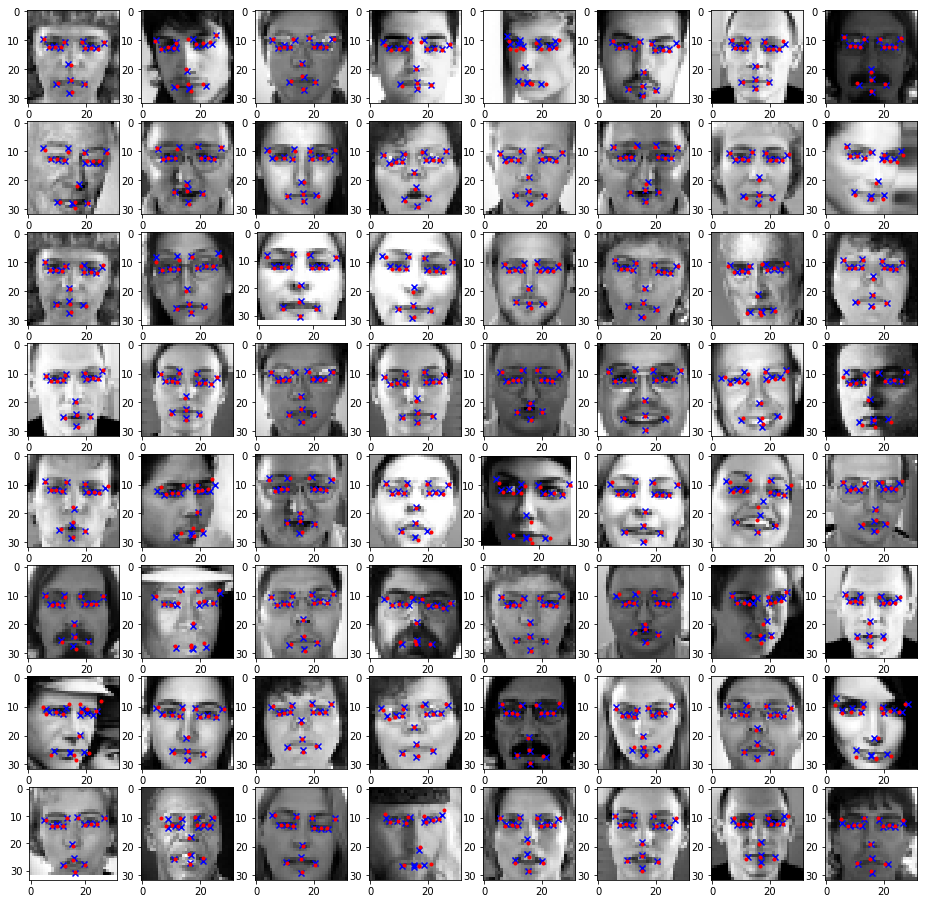

In [1039]:
j=5*64
plt.figure(figsize=(16,16))
for i in range(j,64+j):
    plt.subplot(8,8,(i-j)+1)
    plt.imshow(X_test[i].reshape(32,32),cmap='gray')
    for x_index, y_index in zip(Y_test[i][0:15], Y_test[i][15:30]):
        plt.scatter(x_index,y_index,marker='x',color='blue')
    for x_index1, y_index1 in zip(predicted6[i][0:15], predicted6[i][15:30]):
        plt.scatter(x_index1,y_index1,marker='.',color='red')
plt.show()

## Model 7

In [1031]:
from tensorflow.keras.layers import LeakyReLU
# Create model3
model7 = keras.Sequential()
model7.add(layers.Conv2D(32, kernel_size=(2, 2),data_format='channels_last',
                 activation='linear',
                 input_shape=(32,32,1)))
#model7.add(LeakyReLU(alpha=0.1))
#model6.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model7.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1)))
model7.add(layers.Conv2D(32, (2, 2), activation='linear'))
#model7.add(LeakyReLU(alpha=0.1))
model7.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1)))
#model7.add(layers.Conv2D(128, (3, 3), activation='linear'))
#model7.add(LeakyReLU(alpha=0.1))
#model7.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#model6.add(layers.Conv2D(64, (1, 1), activation='linear'))
#model6.add(LeakyReLU(alpha=0.1))
#model6.add(layers.AveragePooling2D(pool_size=(2, 2),strides=(1, 1)))
model7.add(layers.Flatten())
#model4.add(layers.Dense(100, activation='relu'))
model7.add(layers.Dense(50, activation='linear'))
#model7.add(LeakyReLU(alpha=0.1))
model7.add(layers.Dense(50,activation='linear'))
#model7.add(LeakyReLU(alpha=0.1))
model7.add(layers.Dense(30,activation='linear'))
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model7.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['accuracy','mean_squared_error'])

In [1032]:
EPOCHS =100
history7 = model7.fit(
  X_train_NN, np.round(Y_train,2),
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2747 samples, validate on 687 samples
Epoch 1/100
 - 33s - loss: 22.4820 - acc: 0.5916 - mean_squared_error: 22.4820 - val_loss: 1.2577 - val_acc: 0.7074 - val_mean_squared_error: 1.2577
Epoch 2/100
 - 10s - loss: 1.1563 - acc: 0.7244 - mean_squared_error: 1.1563 - val_loss: 1.1205 - val_acc: 0.7045 - val_mean_squared_error: 1.1205
Epoch 3/100
 - 12s - loss: 1.0105 - acc: 0.7252 - mean_squared_error: 1.0105 - val_loss: 0.9408 - val_acc: 0.7074 - val_mean_squared_error: 0.9408
Epoch 4/100
 - 11s - loss: 0.9406 - acc: 0.7262 - mean_squared_error: 0.9406 - val_loss: 1.0440 - val_acc: 0.7074 - val_mean_squared_error: 1.0440
Epoch 5/100
 - 10s - loss: 0.8923 - acc: 0.7324 - mean_squared_error: 0.8923 - val_loss: 0.8732 - val_acc: 0.7074 - val_mean_squared_error: 0.8732
Epoch 6/100
 - 11s - loss: 0.8138 - acc: 0.7383 - mean_squared_error: 0.8138 - val_loss: 0.8720 - val_acc: 0.7147 - val_mean_squared_error: 0.8720
Epoch 7/100
 - 11s - loss: 0.7185 - acc: 0.7386 - mean_squared_error:

 - 10s - loss: 0.2388 - acc: 0.8311 - mean_squared_error: 0.2388 - val_loss: 0.6020 - val_acc: 0.7627 - val_mean_squared_error: 0.6020
Epoch 57/100
 - 10s - loss: 0.2378 - acc: 0.8344 - mean_squared_error: 0.2378 - val_loss: 0.4096 - val_acc: 0.7438 - val_mean_squared_error: 0.4096
Epoch 58/100
 - 11s - loss: 0.2149 - acc: 0.8369 - mean_squared_error: 0.2149 - val_loss: 0.4049 - val_acc: 0.7656 - val_mean_squared_error: 0.4049
Epoch 59/100
 - 12s - loss: 0.1910 - acc: 0.8344 - mean_squared_error: 0.1910 - val_loss: 0.4075 - val_acc: 0.7787 - val_mean_squared_error: 0.4075
Epoch 60/100
 - 11s - loss: 0.1910 - acc: 0.8387 - mean_squared_error: 0.1910 - val_loss: 0.3989 - val_acc: 0.7758 - val_mean_squared_error: 0.3989
Epoch 61/100
 - 12s - loss: 0.2165 - acc: 0.8395 - mean_squared_error: 0.2165 - val_loss: 0.3963 - val_acc: 0.7656 - val_mean_squared_error: 0.3963
Epoch 62/100
 - 10s - loss: 0.1832 - acc: 0.8511 - mean_squared_error: 0.1832 - val_loss: 0.4163 - val_acc: 0.7686 - val_mean

In [1033]:
predicted7 = model7.predict(X_test_NN)
print(predicted7.shape)
print(Y_test.shape)
np.sqrt(np.sum(np.square((3*predicted7)-(3*Y_test)))/(846*15))

(846, 30)
(846, 30)


2.458160774620475

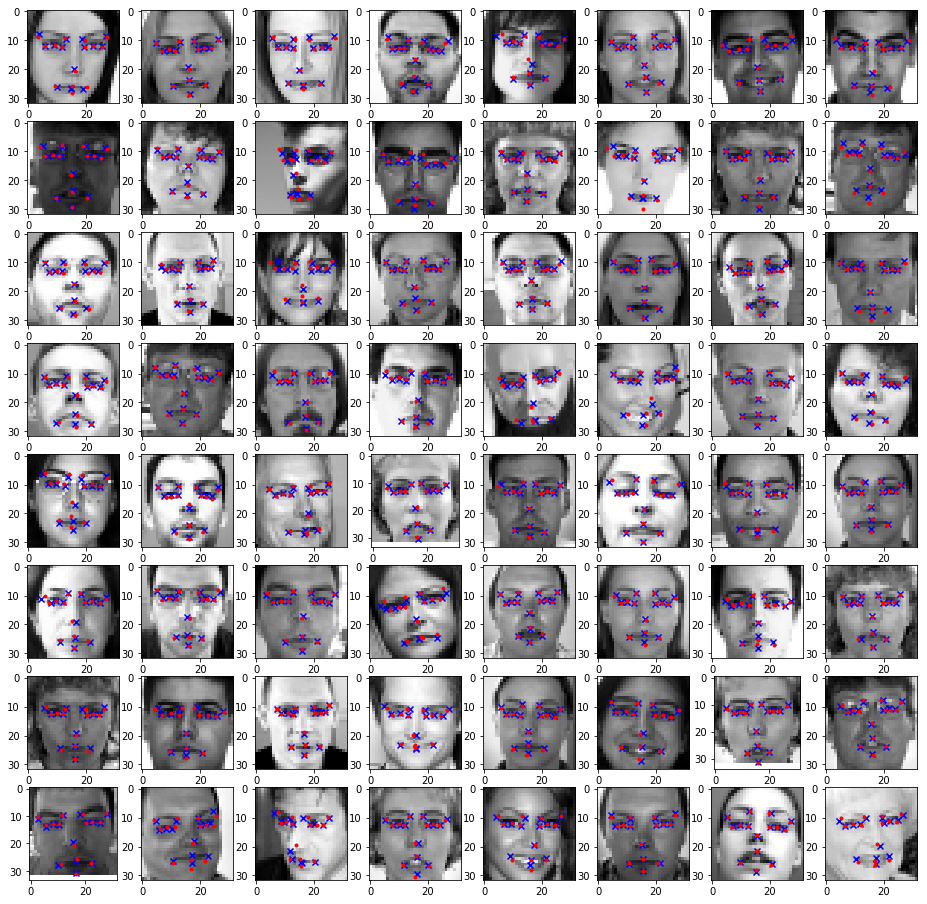

In [1034]:
j=2*64
plt.figure(figsize=(16,16))
for i in range(j,64+j):
    plt.subplot(8,8,(i-j)+1)
    plt.imshow(X_test[i].reshape(32,32),cmap='gray')
    for x_index, y_index in zip(Y_test[i][0:15], Y_test[i][15:30]):
        plt.scatter(x_index,y_index,marker='x',color='blue')
    for x_index1, y_index1 in zip(predicted7[i][0:15], predicted7[i][15:30]):
        plt.scatter(x_index1,y_index1,marker='.',color='red')
plt.show()

## Model 8

In [1046]:
from tensorflow.keras.layers import LeakyReLU
# Create model3
model8 = keras.Sequential()
model8.add(layers.Conv2D(32, kernel_size=(3, 3),data_format='channels_last',
                 activation='linear',
                 input_shape=(32,32,1)))

model8.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1)))

model8.add(layers.Conv2D(64, (3, 3), activation='linear'))

model8.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1)))

model8.add(layers.Flatten())

model8.add(layers.Dense(50, activation='linear'))

model8.add(layers.Dense(50,activation='linear'))

model8.add(layers.Dense(30,activation='linear'))
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model8.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['accuracy','mean_squared_error'])

In [1047]:
EPOCHS =100
history8 = model8.fit(
  X_train_NN, np.round(Y_train,2),
  epochs=EPOCHS, validation_split = 0.2, verbose=2 )

Train on 2747 samples, validate on 687 samples
Epoch 1/100
 - 61s - loss: 39.9599 - acc: 0.2803 - mean_squared_error: 39.9599 - val_loss: 12.4528 - val_acc: 0.7074 - val_mean_squared_error: 12.4528
Epoch 2/100
 - 34s - loss: 10.8409 - acc: 0.3462 - mean_squared_error: 10.8409 - val_loss: 15.5032 - val_acc: 0.7089 - val_mean_squared_error: 15.5032
Epoch 3/100
 - 33s - loss: 7.9937 - acc: 0.3910 - mean_squared_error: 7.9937 - val_loss: 18.0496 - val_acc: 0.7162 - val_mean_squared_error: 18.0496
Epoch 4/100
 - 31s - loss: 7.6066 - acc: 0.4212 - mean_squared_error: 7.6066 - val_loss: 18.1180 - val_acc: 0.7045 - val_mean_squared_error: 18.1180
Epoch 5/100
 - 32s - loss: 6.2431 - acc: 0.4452 - mean_squared_error: 6.2431 - val_loss: 7.0357 - val_acc: 0.7089 - val_mean_squared_error: 7.0357
Epoch 6/100
 - 34s - loss: 5.4856 - acc: 0.4558 - mean_squared_error: 5.4856 - val_loss: 3.1248 - val_acc: 0.7132 - val_mean_squared_error: 3.1248
Epoch 7/100
 - 32s - loss: 5.5061 - acc: 0.4798 - mean_squa

 - 34s - loss: 1.9157 - acc: 0.7259 - mean_squared_error: 1.9157 - val_loss: 0.6790 - val_acc: 0.7162 - val_mean_squared_error: 0.6790
Epoch 57/100
 - 34s - loss: 1.9191 - acc: 0.7084 - mean_squared_error: 1.9191 - val_loss: 0.5711 - val_acc: 0.7496 - val_mean_squared_error: 0.5711
Epoch 58/100
 - 32s - loss: 1.8422 - acc: 0.7248 - mean_squared_error: 1.8422 - val_loss: 0.5637 - val_acc: 0.7394 - val_mean_squared_error: 0.5637
Epoch 59/100
 - 30s - loss: 1.7721 - acc: 0.7266 - mean_squared_error: 1.7721 - val_loss: 0.5862 - val_acc: 0.7438 - val_mean_squared_error: 0.5862
Epoch 60/100
 - 30s - loss: 1.8336 - acc: 0.7295 - mean_squared_error: 1.8336 - val_loss: 0.7305 - val_acc: 0.7336 - val_mean_squared_error: 0.7305
Epoch 61/100
 - 30s - loss: 1.7870 - acc: 0.7273 - mean_squared_error: 1.7870 - val_loss: 0.6491 - val_acc: 0.7234 - val_mean_squared_error: 0.6491
Epoch 62/100
 - 35s - loss: 1.8701 - acc: 0.7233 - mean_squared_error: 1.8701 - val_loss: 1.0039 - val_acc: 0.7380 - val_mean

In [1048]:
predicted8 = model8.predict(X_test_NN)
print(predicted8.shape)
print(Y_test.shape)
np.sqrt(np.sum(np.square((3*predicted8)-(3*Y_test)))/(846*15))

(846, 30)
(846, 30)


2.7987007468738434